In [84]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/siddharth/Downloads/scatter_data.csv")
df
df.columns = df.columns.str.strip()

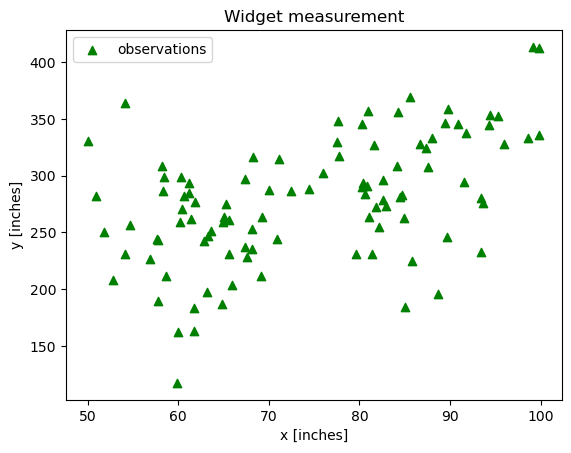

In [169]:

'''
x_min = x.min()
x_max = x.max()
x_min_indx = df.loc[x.idxmin(), y]
x_max_indx = df.loc[x.idxmax(), y]
'''
plt.scatter(x,y, color = 'green', marker = '^', label = "observations")

#plt.plot([x_min, x_max], [x_min_indx, x_max_indx], "r--", label='extreme x points')
plt.title("Widget measurement")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")
plt.legend()
plt.show()

In [77]:
df1 = pd.read_csv("/Users/siddharth/Downloads/student_grades.csv")
df1
df1.columns = df1.columns.str.strip()

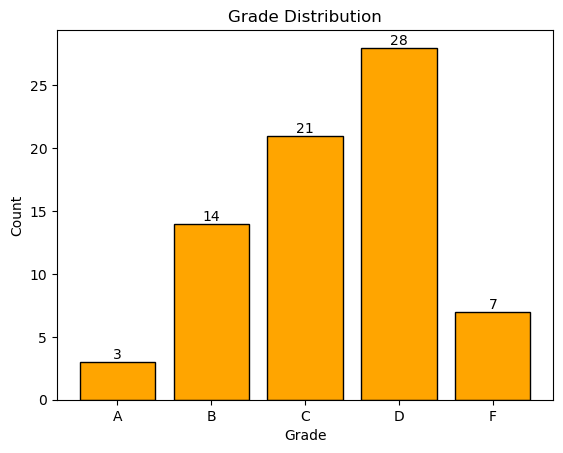

In [175]:
score = [(90, 100), (80, 90), (70, 80), (60, 70), (0, 60)]
label = ['A', 'B', 'C', 'D', 'F']
df1['grade_category'] = pd.cut(df1['avgScore'],
                                       bins=[0, 60, 70, 80, 90, 101],
                                       labels=label,
                                       right=False) 
grades = df1['grade_category'].value_counts().reindex(labels, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [176]:
df2 = pd.read_csv("/Users/siddharth/Downloads/solution_data.csv")
df2.columns = df2.columns.str.strip()


In [124]:
optimal = df2[df2["SolnMethod"] == "optimal"]
merge = df2.merge(optimal, on = '% Problem', suffixes = ('', 'optimal'))
merge['optimality_gap'] = ((merge['Valueoptimal'] - merge['Value'])/merge['Valueoptimal'])*100
heuristic = merge[merge['SolnMethod'] != 'optimal']
average = heuristic.groupby('SolnMethod')['optimality_gap'].mean().reset_index()
boxplot = heuristic.groupby('SolnMethod')['optimality_gap'].apply(list).reset_index(name='optimality_gap')

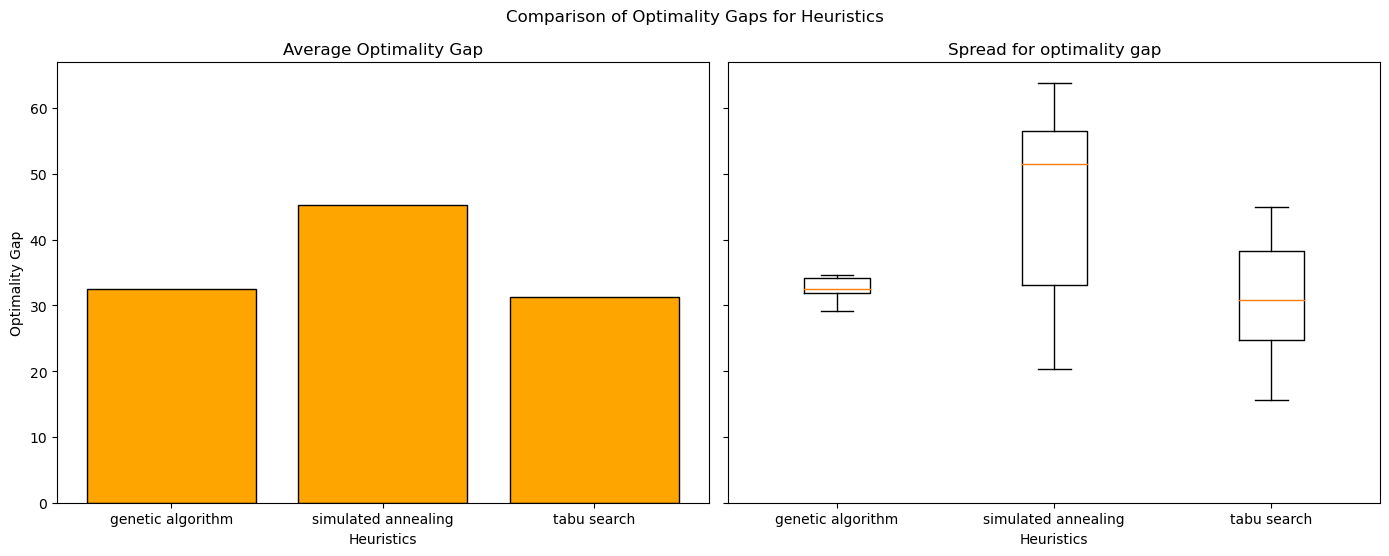

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(average['SolnMethod'], average['optimality_gap'], color = 'orange', edgecolor = 'black')
ax1.set(title = 'Average Optimality Gap', xlabel = 'Heuristics', ylabel = 'Optimality Gap')

boxplot_data = [row['optimality_gap'] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title = 'Spread for optimality gap', xlabel = 'Heuristics', xticklabels = boxplot['SolnMethod'])

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()